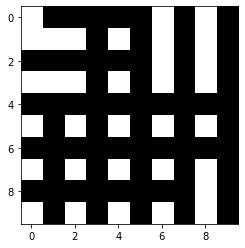

In [77]:
import matplotlib
from pylab import *
import random as rd
%matplotlib inline


n = 10 # size of space: n x n
p = 0.5 # probability of initially positive

def initialize(T):
    global config, nextconfig, list_density, temp
    config = ones([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else -1 
    nextconfig = ones([n, n])
    temp = T
    list_density = []
    
def observe():
    global config, nextconfig, list_density, temp
    cla()
    list_density.append(sum(config))
    imshow(config, vmin = -1, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig, list_density, temp, magnetization
    x,y = rd.randint(0,n-1), rd.randint(0,n-1)
    sum_e = 0
    for dx in [-1, 1]:
        for dy in [-1, 1]: #Von Neumann neighborhood
            sum_e += (config[(x + dx)%n, (y + dy)%n]*config[x,y])
    sum_e *= -1
    prob_flip = min(1, np.exp(2*sum_e/temp)) #Application of rule 4
    if random() < prob_flip:
        nextconfig[x,y] = config[x,y]*-1
    else:
        nextconfig[x,y] = config[x,y]
    config, nextconfig = nextconfig, config
    
    #calculating magnetization
    magnetization = 0
    for x in range(n):
        for x in range(n):
            magnetization += config[x,y]
    magnetization = magnetization/(n**2)

initialize(0.1)
for i in range(100000):
    update()
    observe()

In [80]:
#plotting histograms. I see that 100000 steps take too much time, so I'm reducing it to 10000 - it still gives
#a relatively accurate result
list_magnetization = [[] for i in range(5)]
for T in range(1,6):
    for j in range(100):
        initialize(T)
        for i in range(100000):
            update()
        list_magnetization[T-1].append(magnetization)
    

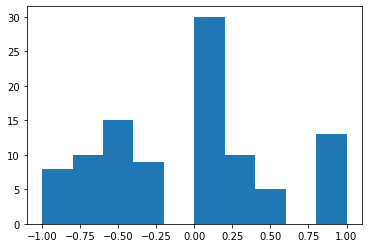

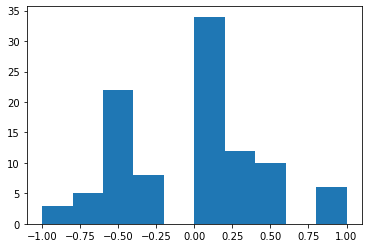

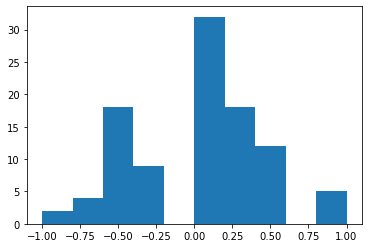

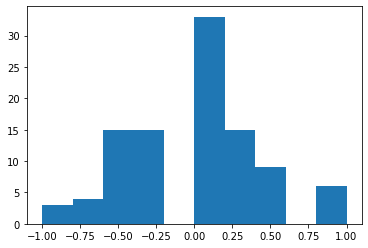

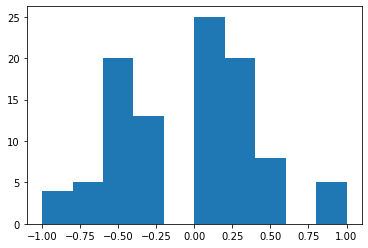

In [82]:
for i in range(5):
    plt.figure()
    plt.hist(list_magnetization[i])